In [3]:
%pylab inline
import time
from collections import defaultdict
import json
import pandas as pd
import os
import sys
stdout = sys.stdout
reload(sys)
sys.setdefaultencoding('utf-8')
sys.stdout = stdout



import numpy as np
import requests
import json 

from datetime import datetime


from textblob import TextBlob

#import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [1]:
#import matplotlib as mpl
#import matplotlib.pyplot as plt
#import seaborn.apionly as sns

#import imp
#imp.reload(mpl); imp.reload(plt); imp.reload(sns)

<class 'pandas.core.frame.DataFrame'>
Index: 262 entries, https://en.wikipedia.org/wiki/Ada_Yonath to https://en.wikipedia.org/wiki/Zhong_Lin_Wang
Data columns (total 8 columns):
Award_date      262 non-null object
Page_created    262 non-null object
Name            262 non-null object
Gender          262 non-null object
Award           262 non-null object
Status          262 non-null object
Field           262 non-null object
Year            262 non-null object
dtypes: object(8)
memory usage: 18.4+ KB


(730851.0, 736330.0)

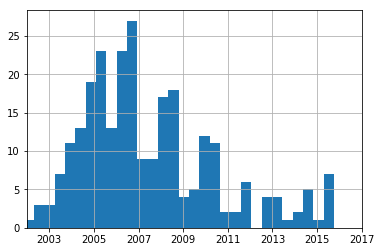

In [77]:
with open("seed_creation_date.json","r") as f:
    sci_aw_dict=json.load(f,encoding="utf-8")
df_aw=pd.DataFrame.from_dict(sci_aw_dict,orient="index")
df_aw.info()

df_aw.Page_created=pd.to_datetime(df_aw.Page_created)
df_aw.Page_created=df_aw.Page_created.apply(lambda x: x.date() )
df_aw.Page_created.hist(bins=30)
plt.xlim(datetime(2002,1,1),datetime(2017,1,1))

In [88]:
print 172./262
print len(df_aw[df_aw.Page_created<datetime(2008,1,1).date()])#172 out of 262


0.656488549618
172


<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, https://en.wikipedia.org/wiki/%C4%90%C3%A0m_Thanh_S%C6%A1n to https://en.wikipedia.org/wiki/Zolt%C3%A1n_Szab%C3%B3_(mathematician)
Data columns (total 3 columns):
Page_created    276 non-null object
Field           276 non-null object
Name            276 non-null object
dtypes: object(3)
memory usage: 8.6+ KB


(730910.0, 736330.0)

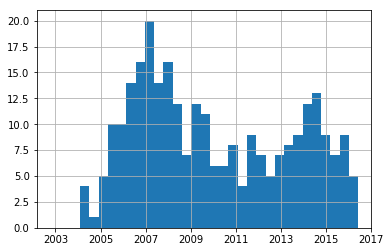

In [84]:
with open("baseline_creation_date.json","r") as f:
    sci_naw_dict=json.load(f,encoding="utf-8")
df_naw=pd.DataFrame.from_dict(sci_naw_dict,orient="index")
df_naw.info()

df_naw.Page_created=pd.to_datetime(df_naw.Page_created)
df_naw.Page_created=df_naw.Page_created.apply(lambda x: x.date() )
df_naw.Page_created.hist(bins=30)
plt.xlim(datetime(2002,3,1),datetime(2017,1,1))

In [87]:
print 105./276
print len(df_naw[df_naw.Page_created<datetime(2008,1,1).date()]) #105 out of 276


0.380434782609
105


# variant 2 from revisions

13642
<class 'pandas.core.frame.DataFrame'>
Int64Index: 275 entries, 0 to 24119
Data columns (total 4 columns):
article         275 non-null object
text            275 non-null object
timestamp       275 non-null object
Page_created    275 non-null object
dtypes: object(4)
memory usage: 10.7+ KB
None


(730851.0, 736330.0)

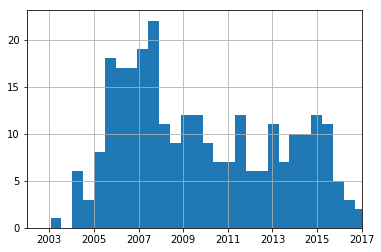

In [72]:
df_b=pd.read_csv("baseline_revisions.csv",sep="\t")

df_b=df_b[["article","text","timestamp"]]
df_b=df_b[~df_b.text.isnull()]
df_b.timestamp=pd.to_datetime(df_b.timestamp)
df_b.timestamp=df_b.timestamp.apply(lambda x: x.date() )
df_b.drop_duplicates(["timestamp","article"],keep="first",inplace=True)
print len(df_b)


created_dict={}
g=df_b.groupby("article")
for article_name,series in g:
    created_dict.update( {article_name:series.timestamp.min()})

df_b["Page_created"]=df_b.article.apply(lambda x: created_dict[x])
df_b.drop_duplicates(["article"],keep="first",inplace=True)
print df_b.info()
df_b.Page_created.hist(bins=30)
plt.xlim(datetime(2002,1,1),datetime(2017,1,1))

31767
<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 0 to 62842
Data columns (total 4 columns):
article         262 non-null object
text            262 non-null object
timestamp       262 non-null object
Page_created    262 non-null object
dtypes: object(4)
memory usage: 10.2+ KB
None


(730851.0, 736330.0)

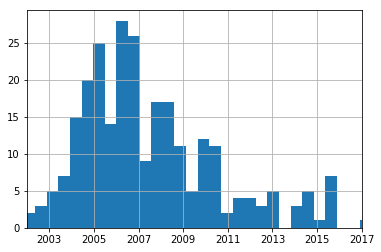

In [73]:
df_s=pd.read_csv("seed_revisions.csv",sep="\t")

df_s=df_b[["article","text","timestamp"]]
df_b=df_b[~df_b.text.isnull()]
df_b.timestamp=pd.to_datetime(df_b.timestamp)
df_b.timestamp=df_b.timestamp.apply(lambda x: x.date() )
df_b.drop_duplicates(["timestamp","article"],keep="first",inplace=True)
print len(df_b)


created_dict={}
g=df_b.groupby("article")
for article_name,series in g:
    created_dict.update( {article_name:series.timestamp.min()})

df_b["Page_created"]=df_b.article.apply(lambda x: created_dict[x])
df_b.drop_duplicates(["article"],keep="first",inplace=True)
print df_b.info()
df_b.Page_created.hist(bins=30)
plt.xlim(datetime(2002,1,1),datetime(2017,1,1))

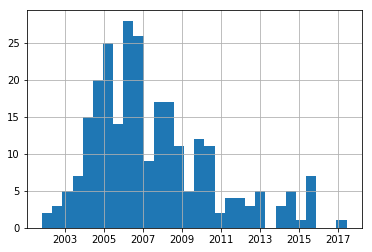

In [74]:
df_b.Page_created.hist(bins=30)